In [ ]:
# Load the dataset
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df = pd.read_csv(next(iter(uploaded.keys())))

In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')

In [ ]:
model_lstm = load_model('lstm_model.h5')


In [ ]:
loaded_gru_model = tf.keras.models.load_model('gru_model.h5')


In [ ]:
loaded_bilstm_model = tf.keras.models.load_model('bilstm_model.h5')


In [ ]:
model = TFBertForSequenceClassification.from_pretrained("bert")


In [ ]:
!pip install pandas

  Using cached pandas-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 14.4 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.sample(8)

,id,qid1,qid2,question1,question2,is_duplicate
327635,327635,138074,4778,How big is the difference between Mandarin and...,What's the difference between Cantonese and Ma...,1
311024,311024,297200,81111,Is it possible that Singapore will re-merge wi...,Is it possible that Singapore will be back to ...,1
106471,106471,175377,175378,What would Pakistan do if they ever win a war ...,Can India win a war against Pakistan?,0
63062,63062,109805,109806,Burglary: What does it feel like to get burgla...,What is it like to rob a house?,0
235776,235776,346552,346553,How can I stop people who know me from recogni...,How can I stop people from being unfair to me?,0
36246,36246,66109,66110,What’s the best way to raise children in San F...,What is the best San Francisco neighborhood to...,0
10901,10901,21087,21088,"What's classy if you’re rich, but trashy if yo...",Do rich people ever feel guilty because they'r...,0
260682,260682,60149,64885,Do we really need reservation system in India?,Is caste reservation system still necessary in...,1


In [ ]:
df.info

<bound method DataFrame.info of             id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404285  404285  433578  379845   
404286  404286   18840  155606   
404287  404287  537928  537929   
404288  404288  537930  537931   
404289  404289  537932  537933   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404285  How many keywords are there in the Racket prog...   
404286          Do you believe there is life after death?   
404287    

In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

As the number of null values are negligible infront of the size of dataset. We will drop the rows completely.

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(404287, 6)

In [ ]:
# to check if there are any duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

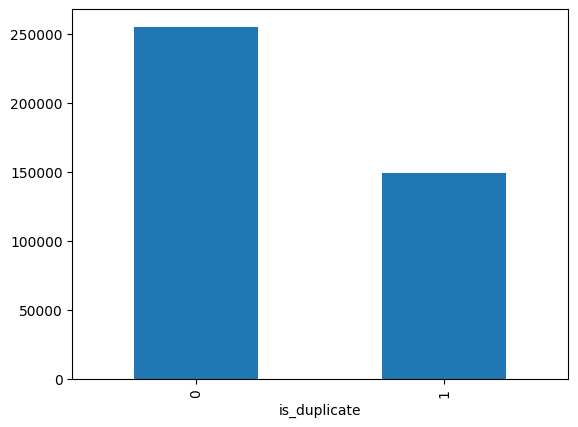

In [ ]:
# to check the distribution of data
import numpy as np
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# to check the number of unique and repeated questions individually
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 537929
Number of questions getting repeated 111778


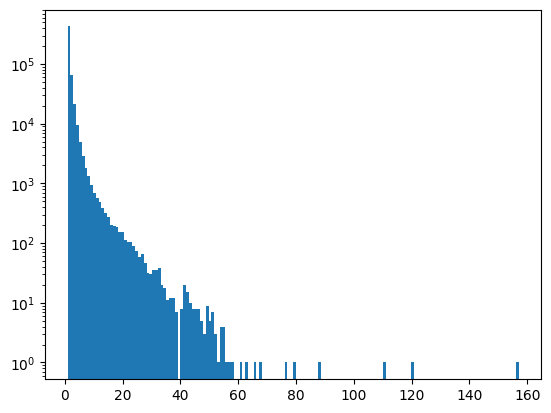

In [ ]:
# to check which question is repeated how many times.
import matplotlib.pyplot as plt
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [ ]:
df_ml = df

In [ ]:
# to get the length of question1 and question2
df_ml['q1_len'] = df_ml['question1'].str.len()
df_ml['q2_len'] = df_ml['question2'].str.len()

/home/pratiksha/Pratiksha Unibo/dl/dl/lib64/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


minimum characters 1
maximum characters 623
average num of characters 59


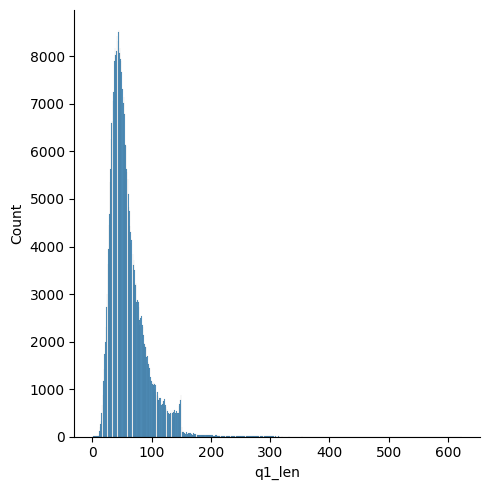

In [ ]:
# plot of the number length of questions in question1 set
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df_ml['q1_len'])
print('minimum characters', df_ml['q1_len'].min())
print('maximum characters', df_ml['q1_len'].max())
print('average num of characters', int(df_ml['q1_len'].mean()))


/home/pratiksha/Pratiksha Unibo/dl/dl/lib64/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


minimum characters 1
maximum characters 1169
average num of characters 60


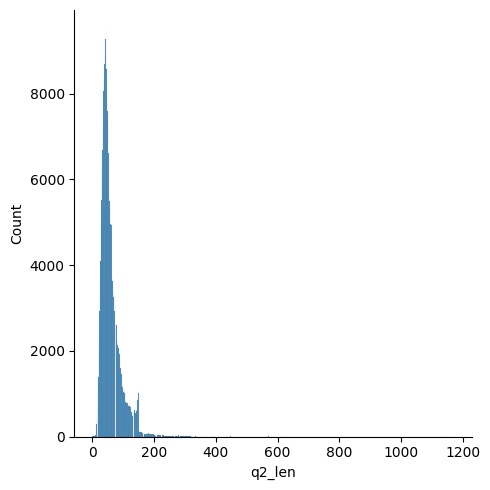

In [ ]:
# plot of the number length of questions in question1 set
sns.displot(df_ml['q2_len'])
print('minimum characters', df_ml['q2_len'].min())
print('maximum characters', df_ml['q2_len'].max())
print('average num of characters', int(df_ml['q2_len'].mean()))


In [ ]:
# to calculate the number of words in question1 and question2
df_ml['q1_num_words'] = df_ml['question1'].apply(lambda row: len(row.split(" ")))
df_ml['q2_num_words'] = df_ml['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


/home/pratiksha/Pratiksha Unibo/dl/dl/lib64/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


minimum words 1
maximum words 125
average num of words 10


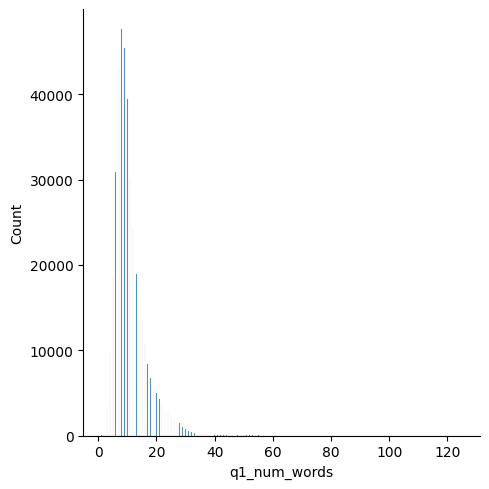

In [ ]:
# plot of number of words in question1 set
sns.displot(df_ml['q1_num_words'])
print('minimum words', df_ml['q1_num_words'].min())
print('maximum words', df_ml['q1_num_words'].max())
print('average num of words', int(df_ml['q1_num_words'].mean()))


/home/pratiksha/Pratiksha Unibo/dl/dl/lib64/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


minimum words 1
maximum words 237
average num of words 11


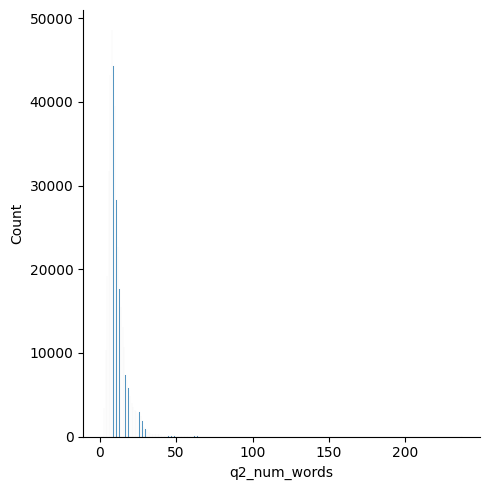

In [ ]:
# plot of number of words in question2 set
sns.displot(df_ml['q2_num_words'])
print('minimum words', df_ml['q2_num_words'].min())
print('maximum words', df_ml['q2_num_words'].max())
print('average num of words', int(df_ml['q2_num_words'].mean()))


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [ ]:
# to calculate common words
df_ml['word_common'] = df_ml.apply(common_words, axis=1)
df_ml.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2


/tmp/ipykernel_1204918/3146067520.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ml[df_ml['is_duplicate'] == 0]['word_common'], label='non-duplicate')
/tmp/ipykernel_1204918/3146067520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ml[df_ml['is_duplicate'] == 1]['word_common'], l

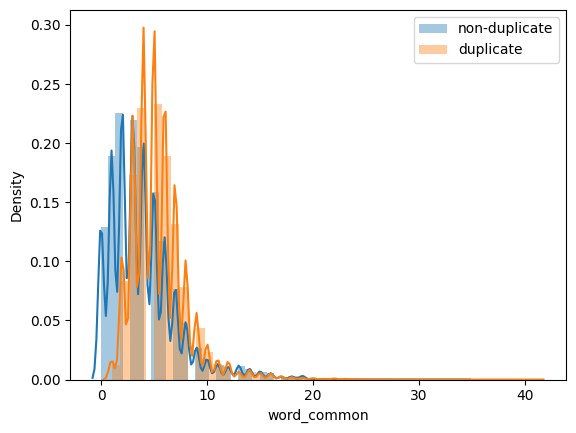

In [ ]:
# to plot the common words relation with duplicate and non-duplicate questions
sns.distplot(df_ml[df_ml['is_duplicate'] == 0]['word_common'], label='non-duplicate')
sns.distplot(df_ml[df_ml['is_duplicate'] == 1]['word_common'], label='duplicate')
plt.legend()
plt.show()

In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [ ]:
# calculated sum of all words in question1 + question2
df_ml['word_total'] = df_ml.apply(total_words, axis=1)
df_ml.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20


/tmp/ipykernel_1204918/3782365159.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ml[df_ml['is_duplicate'] == 0]['word_total'], label='non-duplicate')
/tmp/ipykernel_1204918/3782365159.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ml[df_ml['is_duplicate'] == 1]['word_total'], lab

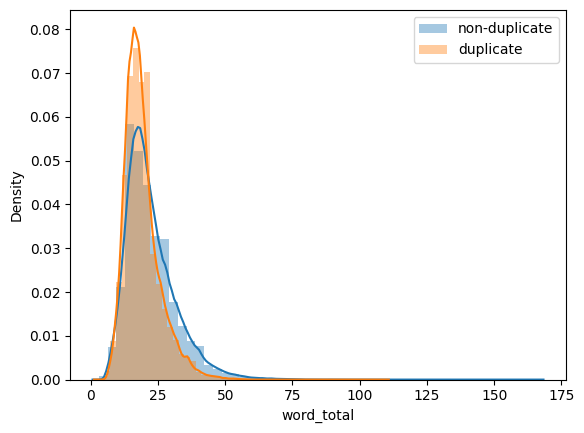

In [ ]:
sns.distplot(df_ml[df_ml['is_duplicate'] == 0]['word_total'], label='non-duplicate')
sns.distplot(df_ml[df_ml['is_duplicate'] == 1]['word_total'], label='duplicate')
plt.legend()
plt.show()

In [ ]:
# calculted word_share | word_share = word_common/word_total
df_ml['word_share'] = round(df_ml['word_common']/df_ml['word_total'],2)
df_ml.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20,0.20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20,0.10


/tmp/ipykernel_1204918/1346880454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ml[df_ml['is_duplicate'] == 0]['word_share'], label='non-duplicate')
/tmp/ipykernel_1204918/1346880454.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ml[df_ml['is_duplicate'] == 1]['word_share'], lab

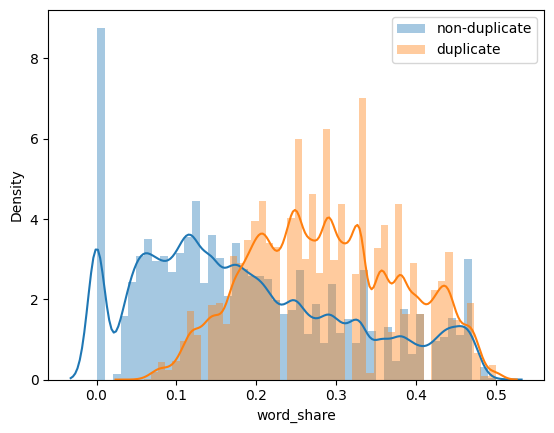

In [ ]:
sns.distplot(df_ml[df_ml['is_duplicate'] == 0]['word_share'], label='non-duplicate')
sns.distplot(df_ml[df_ml['is_duplicate'] == 1]['word_share'], label='duplicate')
plt.legend()
plt.show()

In [ ]:
df_ml.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20,0.20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20,0.10


## Random Forest

In [ ]:
df_ml = df_ml.drop('question1', axis=1)
df_ml = df_ml.drop('question2', axis=1)

df_ml.head()

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,0,66,57,14,12,10,23,0.43
1,1,3,4,0,51,88,8,13,4,20,0.20
2,2,5,6,0,73,59,14,10,4,24,0.17
3,3,7,8,0,50,65,11,9,0,19,0.00
4,4,9,10,0,76,39,13,7,2,20,0.10


In [ ]:
y = df_ml['is_duplicate']
X = df_ml.drop('is_duplicate', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1875, random_state=42)
print('X_train is {}, X_test is {}, y_train is {} and y_test is {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train is (262786, 10), X_test is (80858, 10), y_train is (262786,) and y_test is (80858,)


In [ ]:
X_train

,id,qid1,qid2,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
232040,232040,341981,33081,40,36,7,8,2,15,0.13
397544,397544,24618,129698,61,31,14,6,2,20,0.10
385450,385450,517581,517582,27,63,5,11,0,16,0.00
398386,398386,531606,531607,110,129,20,24,7,42,0.17
66422,66422,115130,82404,39,45,6,7,2,13,0.15
...,...,...,...,...,...,...,...,...,...,...
1743,1743,3471,3472,140,243,23,45,8,56,0.14
220097,220097,323715,327133,57,49,10,10,2,20,0.10
219756,219756,51114,25139,55,52,10,9,7,19,0.37
240867,240867,330901,352776,86,56,15,10,3,22,0.14


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.7744688218852803

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
# Calculate F1 score
f1_rf = f1_score(y_test, y_pred_rf)
# Print the results
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)

Random Forest - Precision: 0.712973846605936
Random Forest - Recall: 0.6506436041834271
Random Forest - F1 Score: 0.6803841839596185


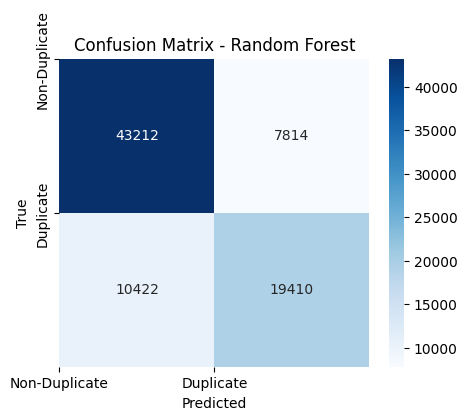

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d")

# Set labels, title, and ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest")

# Set tick labels
tick_labels = ['Non-Duplicate', 'Duplicate']
plt.xticks(np.arange(2), tick_labels)
plt.yticks(np.arange(2), tick_labels)

# Display the plot
plt.show()


## XGBoost

In [ ]:
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
accuracy_xgb

0.7846224244972668

In [ ]:
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
# Calculate F1 score
f1_xgb = f1_score(y_test, y_pred_xgb)
# Print the results
print("XGBoost - Precision:", precision_xgb)
print("XGBoost - Recall:", recall_xgb)
print("XGBoost - F1 Score:", f1_xgb)

XGBoost - Precision: 0.7301575532900834
XGBoost - Recall: 0.6602306248323947
XGBoost - F1 Score: 0.6934356681394898


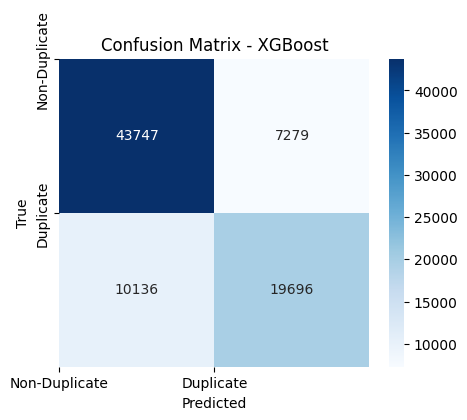

In [ ]:

# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, cmap="Blues", fmt="d")

# Set labels, title, and ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - XGBoost")

# Set tick labels
tick_labels = ['Non-Duplicate', 'Duplicate']
plt.xticks(np.arange(2), tick_labels)
plt.yticks(np.arange(2), tick_labels)

# Display the plot
plt.show()


We noticed that XGBoost has better performance than Random Forest

## LSTM

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


2023-08-02 03:52:48.807276: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 03:52:49.033452: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 03:52:49.034737: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 03:52:50.467881: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
X = df[['question1', 'question2']].values
y = df['is_duplicate'].values


X[:, 0] = X[:, 0].astype(str)
X[:, 1] = X[:, 1].astype(str)
X[:, 0] = np.where(X[:, 0] == 'nan', 'missing_question', X[:, 0])
X[:, 1] = np.where(X[:, 1] == 'nan', 'missing_question', X[:, 1])
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train[:, 0] + X_train[:, 1])
X_train_seq1 = tokenizer.texts_to_sequences(X_train[:, 0])
X_train_seq2 = tokenizer.texts_to_sequences(X_train[:, 1])
X_val_seq1 = tokenizer.texts_to_sequences(X_val[:, 0])
X_val_seq2 = tokenizer.texts_to_sequences(X_val[:, 1])

max_sequence_length = max(max(len(seq) for seq in X_train_seq1), max(len(seq) for seq in X_train_seq2))

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
lstm_units = 64
batch_size = 32
epochs = 10





X_train_padded_seq1 = pad_sequences(X_train_seq1, maxlen=max_sequence_length, padding='post')
X_train_padded_seq2 = pad_sequences(X_train_seq2, maxlen=max_sequence_length, padding='post')
X_val_padded_seq1 = pad_sequences(X_val_seq1, maxlen=max_sequence_length, padding='post')
X_val_padded_seq2 = pad_sequences(X_val_seq2, maxlen=max_sequence_length, padding='post')


In [ ]:
# max_sequence_length = max(max(len(seq) for seq in X_train_seq1), max(len(seq) for seq in X_train_seq2))

# vocab_size = len(tokenizer.word_index) + 1
# embedding_dim = 100
# lstm_units = 64
# batch_size = 32
# epochs = 10


In [ ]:
input1 = Input(shape=(max_sequence_length,))
input2 = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(vocab_size, embedding_dim)
lstm_layer = LSTM(lstm_units)

In [ ]:
x1 = embedding_layer(input1)
x1 = lstm_layer(x1)

# Sequence 2
x2 = embedding_layer(input2)
x2 = lstm_layer(x2)

# Concatenate outputs from both sequences
merged = tf.keras.layers.concatenate([x1, x2])

output = Dense(1, activation='sigmoid')(merged)
model = Model(inputs=[input1, input2], outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# # Train the model with validation data
# model.fit(
#     [X_train_padded_seq1, X_train_padded_seq2],
#     y_train,
#     batch_size=batch_size,
#     epochs=epochs,
#     validation_data=([X_val_padded_seq1, X_val_padded_seq2], y_val)
# )

# # Save the model to a file
# model.save('lstm_model.h5')

In [ ]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


1896/1896 [==============================] - 67s 35ms/step
Accuracy: 0.6293
F1 Score: 0.0000


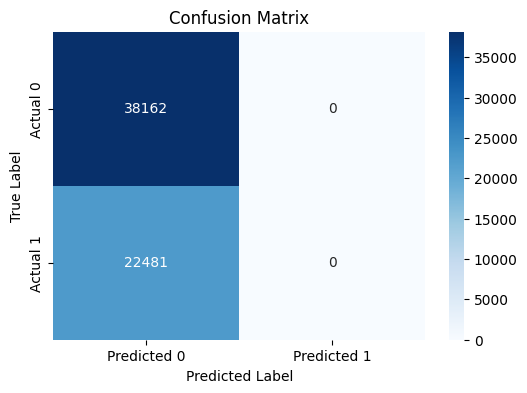

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     38162
           1       0.00      0.00      0.00     22481

    accuracy                           0.63     60643
   macro avg       0.31      0.50      0.39     60643
weighted avg       0.40      0.63      0.49     60643

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     38162
           1       0.00      0.00      0.00     22481

    accuracy                           0.63     60643
   macro avg       0.31      0.50      0.39     60643
weighted avg       0.40      0.63      0.49     60643



/home/pratiksha/Pratiksha Unibo/dl/dl/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pratiksha/Pratiksha Unibo/dl/dl/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pratiksha/Pratiksha Unibo/dl/dl/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [ ]:
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# model_lstm = load_model('lstm_model.h5')
# Predict on the validation data
y_val_pred_lstm = model_lstm.predict([X_val_padded_seq1, X_val_padded_seq2])
y_val_pred_lstm = np.round(y_val_pred_lstm).flatten().astype(int)

accuracy_lstm = accuracy_score(y_val, y_val_pred_lstm)
print(f"Accuracy: {accuracy_lstm:.4f}")

f1_lstm = f1_score(y_val, y_val_pred_lstm)
print(f"F1 Score: {f1_lstm:.4f}")

# conf_matrix_lstm = confusion_matrix(y_val, y_val_pred_lstm)
# conf_matrix_df = pd.DataFrame(conf_matrix_lstm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
# print("Confusion Matrix:")
# print(conf_matrix_df)



conf_matrix_lstm = confusion_matrix(y_val, y_val_pred_lstm)
conf_matrix_df = pd.DataFrame(conf_matrix_lstm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Create and display the classification report
class_report = classification_report(y_val, y_val_pred_lstm)
print("Classification Report:")
print(class_report)


class_report_lstm = classification_report(y_val, y_val_pred_lstm)
print("Classification Report:")
print(class_report_lstm)

The performance of LSTM model is worse then random forest so now we will try to implement BiLSTM

## GRU

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, GRU, Dense, concatenate

In [ ]:
df['question1'].fillna('', inplace=True)
df['question2'].fillna('', inplace=True)

# Remove any rows with missing values in 'question1' and 'question2' columns
df.dropna(subset=['question1', 'question2'], inplace=True)

In [ ]:
train_data = df.sample(frac=0.8, random_state=42)
remaining_data = df.drop(train_data.index)
validation_data = remaining_data.sample(frac=0.5, random_state=42)
test_data = remaining_data.drop(validation_data.index)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['question1'] + train_data['question2'])

train_seq1 = tokenizer.texts_to_sequences(train_data['question1'])
train_seq2 = tokenizer.texts_to_sequences(train_data['question2'])
train_labels = train_data['is_duplicate']

validation_seq1 = tokenizer.texts_to_sequences(validation_data['question1'])
validation_seq2 = tokenizer.texts_to_sequences(validation_data['question2'])
validation_labels = validation_data['is_duplicate']

test_seq1 = tokenizer.texts_to_sequences(test_data['question1'])
test_seq2 = tokenizer.texts_to_sequences(test_data['question2'])
test_labels = test_data['is_duplicate']

vocab_size = len(tokenizer.word_index) + 1
max_length = max(max(map(len, train_seq1)), max(map(len, train_seq2)))

train_seq1 = pad_sequences(train_seq1, maxlen=max_length)
train_seq2 = pad_sequences(train_seq2, maxlen=max_length)
validation_seq1 = pad_sequences(validation_seq1, maxlen=max_length)
validation_seq2 = pad_sequences(validation_seq2, maxlen=max_length)
test_seq1 = pad_sequences(test_seq1, maxlen=max_length)
test_seq2 = pad_sequences(test_seq2, maxlen=max_length)


In [ ]:
# embedding_dim = 100
# gru_units = 64

# input1 = tf.keras.Input(shape=(max_length,))
# input2 = tf.keras.Input(shape=(max_length,))

# embedding_layer = Embedding(vocab_size, embedding_dim)

# gru_layer = GRU(gru_units)

# embedding1 = embedding_layer(input1)
# embedding2 = embedding_layer(input2)

# gru1 = gru_layer(embedding1)
# gru2 = gru_layer(embedding2)

# concatenated_output = concatenate([gru1, gru2])

# output = Dense(1, activation='sigmoid')(concatenated_output)

# model_gru = Model(inputs=[input1, input2], outputs=output)

# model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# history_gru = model_gru.fit([train_seq1, train_seq2], train_labels,
#           validation_data=([validation_seq1, validation_seq2], validation_labels),
#           epochs=10, batch_size=32)

# model_gru.save('gru_model.h5')


In [ ]:
# loaded_gru_model = tf.keras.models.load_model('gru_model.h5')

test_loss_gru, test_accuracy_gru = loaded_gru_model.evaluate([test_seq1, test_seq2], test_labels)
print('Test Loss:', test_loss_gru)
print('Test Accuracy:', test_accuracy_gru)

1264/1264 [==============================] - 36s 28ms/step - loss: 1.6584 - accuracy: 0.5824
Test Loss: 1.6583694219589233
Test Accuracy: 0.5823542475700378


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

predictions_gru = loaded_gru_model.predict([test_seq1, test_seq2])
predicted_labels_gru = np.round(predictions_gru).flatten().astype(int)

test_labels = np.array(test_labels)

report_gru = classification_report(test_labels, predicted_labels_gru, digits=4)

cm_gru = confusion_matrix(test_labels, predicted_labels_gru)

print("Classification Report:")
print(report_gru)

print("\nConfusion Matrix:")
print(cm_gru)

1264/1264 [==============================] - 38s 30ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.6725    0.6579    0.6651     25484
           1     0.4374    0.4536    0.4454     14945

    accuracy                         0.5824     40429
   macro avg     0.5549    0.5557    0.5552     40429
weighted avg     0.5856    0.5824    0.5839     40429


Confusion Matrix:
[[16765  8719]
 [ 8166  6779]]


In [ ]:
report_lines = report_gru.split('\n')
f1_weighted_avg_line = report_lines[-2]
f1_weighted_avg_GRU = float(f1_weighted_avg_line.split()[4])
print("F1-score (weighted avg):", f1_weighted_avg_GRU)

F1-score (weighted avg): 0.5839


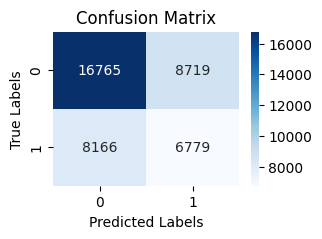

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 2))
sns.heatmap(cm_gru, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The results are better and satisfactory but we will still try to improve the model performance and now we will use BiLSTM

### BiLSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['question1'] + train_data['question2'])

train_seq1 = tokenizer.texts_to_sequences(train_data['question1'])
train_seq2 = tokenizer.texts_to_sequences(train_data['question2'])
train_labels = train_data['is_duplicate']

validation_seq1 = tokenizer.texts_to_sequences(validation_data['question1'])
validation_seq2 = tokenizer.texts_to_sequences(validation_data['question2'])
validation_labels = validation_data['is_duplicate']

test_seq1 = tokenizer.texts_to_sequences(test_data['question1'])
test_seq2 = tokenizer.texts_to_sequences(test_data['question2'])
test_labels = test_data['is_duplicate']

vocab_size = len(tokenizer.word_index) + 1
max_length = max(max(map(len, train_seq1)), max(map(len, train_seq2)))

In [ ]:
train_seq1 = pad_sequences(train_seq1, maxlen=max_length)
train_seq2 = pad_sequences(train_seq2, maxlen=max_length)
validation_seq1 = pad_sequences(validation_seq1, maxlen=max_length)
validation_seq2 = pad_sequences(validation_seq2, maxlen=max_length)
test_seq1 = pad_sequences(test_seq1, maxlen=max_length)
test_seq2 = pad_sequences(test_seq2, maxlen=max_length)

In [ ]:
# embedding_dim = 100
# lstm_units = 32

# input1 = tf.keras.Input(shape=(max_length,))
# input2 = tf.keras.Input(shape=(max_length,))

# embedding_layer = Embedding(vocab_size, embedding_dim)

# lstm_layer = Bidirectional(LSTM(lstm_units))

# embedding1 = embedding_layer(input1)
# embedding2 = embedding_layer(input2)

# lstm1 = lstm_layer(embedding1)
# lstm2 = lstm_layer(embedding2)

# concatenated_output = tf.keras.layers.concatenate([lstm1, lstm2])

# output = Dense(1, activation='sigmoid')(concatenated_output)

# model_bilstm = Model(inputs=[input1, input2], outputs=output)

# model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# history_bilstm = model_bilstm.fit([train_seq1, train_seq2], train_labels,
#           validation_data=([validation_seq1, validation_seq2], validation_labels),
#           epochs=10, batch_size=32)

# model_bilstm.save('bilstm_model.h5')


In [ ]:
# loaded_bilstm_model = tf.keras.models.load_model('bilstm_model.h5')

test_loss_bilstm, test_accuracy_bilstm = loaded_bilstm_model.evaluate([test_seq1, test_seq2], test_labels)
print('Test Loss:', test_loss_bilstm)
print('Test Accuracy:', test_accuracy_bilstm)


1264/1264 [==============================] - 40s 31ms/step - loss: 1.5390 - accuracy: 0.5982
Test Loss: 1.5389755964279175
Test Accuracy: 0.5982092022895813


In [ ]:
test_pred = loaded_bilstm_model.predict([test_seq1, test_seq2])
test_pred = np.round(test_pred).flatten()

print("Classification Report:")
print(classification_report(test_labels, test_pred))
print("Confusion Matrix:")
print(confusion_matrix(test_labels, test_pred))


1264/1264 [==============================] - 41s 32ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68     25484
           1       0.46      0.45      0.45     14945

    accuracy                           0.60     40429
   macro avg       0.57      0.57      0.57     40429
weighted avg       0.60      0.60      0.60     40429

Confusion Matrix:
[[17507  7977]
 [ 8267  6678]]


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

predictions_bilstm = loaded_bilstm_model.predict([test_seq1, test_seq2])
predicted_labels_bilstm = np.round(predictions_bilstm).flatten().astype(int)

test_labels = np.array(test_labels)

report_bilstm = classification_report(test_labels, predicted_labels_bilstm, digits=4)

cm_bilstm = confusion_matrix(test_labels, predicted_labels_bilstm)

print("Classification Report:")
print(report_bilstm)

print("\nConfusion Matrix:")
print(cm_bilstm)

1264/1264 [==============================] - 42s 33ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.6793    0.6870    0.6831     25484
           1     0.4557    0.4468    0.4512     14945

    accuracy                         0.5982     40429
   macro avg     0.5675    0.5669    0.5672     40429
weighted avg     0.5966    0.5982    0.5974     40429


Confusion Matrix:
[[17507  7977]
 [ 8267  6678]]


In [ ]:
report_lines = report_bilstm.split('\n')
f1_weighted_avg_line = report_lines[-2]
f1_weighted_avg_bilstm = float(f1_weighted_avg_line.split()[4])
print("F1-score (weighted avg):", f1_weighted_avg_bilstm)

F1-score (weighted avg): 0.5974


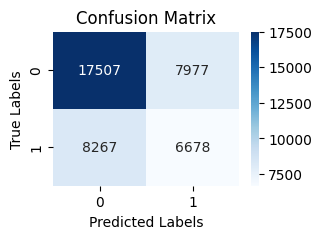

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 2))
sns.heatmap(cm_bilstm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### BERT

In [ ]:
!pip install transformers


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install tensorflow


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModel

2023-08-02 03:14:25.821911: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 03:14:26.071182: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 03:14:26.072794: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 03:14:27.785228: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/pratiksha/Pratiksha Unibo/dl/dl/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split

features = df[['question1', 'question2']]
target = df['is_duplicate']

# Convert 'question1' and 'question2' columns to strings
features['question1'] = features['question1'].astype(str)
features['question2'] = features['question2'].astype(str)

# Train-Test Split
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=100, random_state=42)

# Split the train dataset further into train and validation
train_features, val_features, train_target, val_target = train_test_split(
    train_features, train_target, test_size=100, random_state=42)


# train_features, testval_features, train_target, testval_target = train_test_split(
#     features, target, test_size=0.25, random_state=42)

# # Split the testval dataset into test and validation (50% test, 50% validation)
# test_features, val_features, test_target, val_target = train_test_split(
#     testval_features, testval_target, test_size=0.5, random_state=42)



max_length = 128
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization
train_encodings = tokenizer(list(train_features['question1']),
                            list(train_features['question2']),
                            truncation=True, padding=True, max_length=max_length)

val_encodings = tokenizer(list(val_features['question1']),
                          list(val_features['question2']),
                          truncation=True, padding=True, max_length=max_length)

test_encodings = tokenizer(list(test_features['question1']),
                           list(test_features['question2']),
                           truncation=True, padding=True, max_length=max_length)

# Creating TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': train_encodings['input_ids'],
        'token_type_ids': train_encodings['token_type_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    train_target.values
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': val_encodings['input_ids'],
        'token_type_ids': val_encodings['token_type_ids'],
        'attention_mask': val_encodings['attention_mask']
    },
    val_target.values
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': test_encodings['input_ids'],
        'token_type_ids': test_encodings['token_type_ids'],
        'attention_mask': test_encodings['attention_mask']
    },
    test_target.values
))

/tmp/ipykernel_1207778/2369039015.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['question1'] = features['question1'].astype(str)
/tmp/ipykernel_1207778/2369039015.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['question2'] = features['question2'].astype(str)
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been remove

In [ ]:
# model_bert_tiny_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
# model_bert_tiny_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# # Increase the batch size for more efficient training
# batch_size = 16

# history_berttiny = model_bert_tiny_model.fit(
#     x=train_dataset.batch(batch_size),
#     epochs=2,
#     validation_data=val_dataset.batch(batch_size)
# )

# # Save the trained model for later use
# model_bert_tiny_model.save_pretrained("bert_tiny_saved_model")

In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from sklearn.metrics import accuracy_score

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained("bert")

# Load the test dataset
max_length = 128
batch_size=16
test_encodings = tokenizer(list(test_features['question1']),
                           list(test_features['question2']),
                           truncation=True, padding=True, max_length=max_length)
test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': test_encodings['input_ids'],
        'token_type_ids': test_encodings['token_type_ids'],
        'attention_mask': test_encodings['attention_mask']
    },
    test_target.values
)).batch(batch_size)

# Calculate accuracy on the test dataset
predictions = model.predict(test_dataset)
predicted_labels = tf.argmax(predictions.logits, axis=1)
true_labels = test_target.values

accuracy = accuracy_score(true_labels, predicted_labels)
print("Test Accuracy:", accuracy)


Some layers from the model checkpoint at bert were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at bert.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


7/7 [==============================] - 12s 1s/step
Test Accuracy: 0.13


In [ ]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


Confusion Matrix:
[[12 56]
 [31  1]]


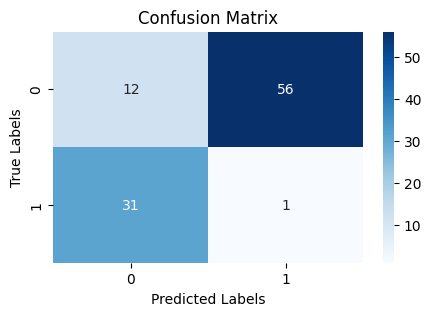

In [ ]:
# Print the confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix_bert = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix_bert)


plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_bert, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

class_labels_bert = ['0', '1']  # Labels for binary classification
class_report_bert = classification_report(true_labels, predicted_labels, target_names=class_labels_bert)
print("Classification Report:")
print(class_report_bert)


Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.18      0.22        68
           1       0.02      0.03      0.02        32

    accuracy                           0.13       100
   macro avg       0.15      0.10      0.12       100
weighted avg       0.20      0.13      0.15       100



In [ ]:
report_lines = class_report_bert.split('\n')
f1_weighted_avg_line = report_lines[-2]
f1_weighted_avg_bert = float(f1_weighted_avg_line.split()[4])
print("F1-score (weighted avg):", f1_weighted_avg_bert)


F1-score (weighted avg): 0.15


**As we see, the accuracy and the f1-score for BERT model is very poor. This can have multiple reasons like the unbalance in the dataset or less epochs due to limited resource**

### MODEL COMPARISON

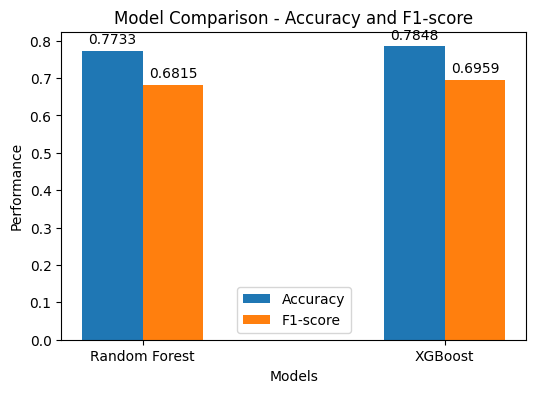

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Random Forest', 'XGBoost']
accuracy_values = [accuracy_rf, accuracy_xgb]
f1_macro_avg_values = [f1_rf, f1_xgb]

bar_width = 0.20

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(r1, accuracy_values, width=bar_width, label='Accuracy')
rects2 = ax.bar(r2, f1_macro_avg_values, width=bar_width, label='F1-score')

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('Performance')
ax.set_xticks([r + bar_width/2 for r in range(len(models))])
ax.set_xticklabels(models)
ax.set_title('Model Comparison - Accuracy and F1-score')
ax.legend()

plt.show()

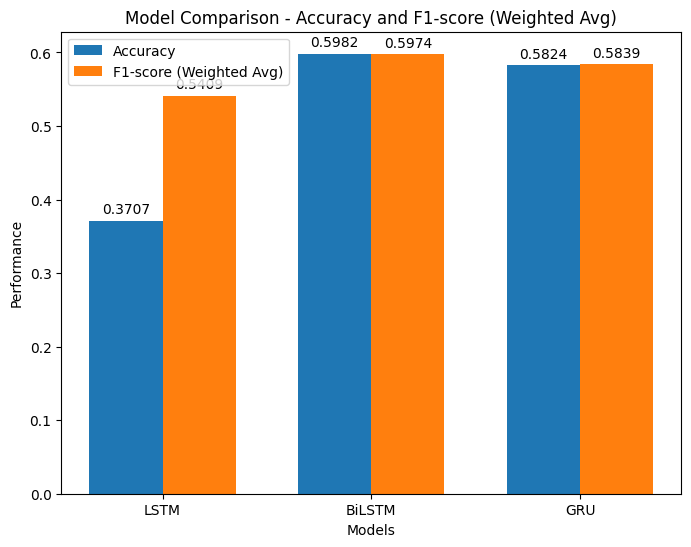

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = ['LSTM', 'BiLSTM', 'GRU']
accuracy_values = [accuracy_lstm, test_accuracy_bilstm, test_accuracy_gru]
f1_macro_avg_values = [f1_lstm, f1_weighted_avg_bilstm, f1_weighted_avg_GRU]

bar_width = 0.35

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(r1, accuracy_values, width=bar_width, label='Accuracy')
rects2 = ax.bar(r2, f1_macro_avg_values, width=bar_width, label='F1-score (Weighted Avg)')

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('Performance')
ax.set_xticks([r + bar_width/2 for r in range(len(models))])
ax.set_xticklabels(models)
ax.set_title('Model Comparison - Accuracy and F1-score (Weighted Avg)')
ax.legend()

plt.show()

We notice that BiLSTM and GRU give almost similar results. And these are our best models.

### ERROR ANALYSIS

Our best two models are GRU and BiLST. Lets do some manual inspection on these.

#### Bilstm

In [ ]:
predictions = loaded_bilstm_model.predict([test_seq1, test_seq2])
predicted_labels = np.round(predictions).flatten().astype(int)


1264/1264 [==============================] - 90s 71ms/step


In [ ]:
results_bilstm = pd.DataFrame({'question1': test_data['question1'],
                       'question2': test_data['question2'],
                       'predicted_label': predicted_labels,
                       'true_label': test_labels})


In [ ]:
# adding some features to later inspect their impact on the output
results_bilstm['question1_words'] = results_bilstm['question1'].apply(lambda x: len(x.split()))
results_bilstm['question2_words'] = results_bilstm['question2'].apply(lambda x: len(x.split()))
results_bilstm['question1_length'] = results_bilstm['question1'].apply(len)
results_bilstm['question2_length'] = results_bilstm['question2'].apply(len)
results_bilstm['common_words'] = results_bilstm.apply(lambda row: len(set(row['question1'].lower().split()).intersection(row['question2'].lower().split())), axis=1)
results_bilstm['total_words'] = results_bilstm.apply(lambda row: len(row['question1'].lower().split()) + len(row['question2'].lower().split()), axis=1)
results_bilstm['word_share'] = results_bilstm.apply(lambda row: row['common_words'] / row['total_words'] if row['total_words'] > 0 else 0, axis=1)

In [ ]:
results_bilstm.head()

,question1,question2,predicted_label,true_label,question1_words,question2_words,question1_length,question2_length,common_words,total_words,word_share
13,What was your first sexual experience like?,What was your first sexual experience?,1,1,7,6,43,38,5,13,0.384615
15,What would a Trump presidency mean for current...,How will a Trump presidency affect the student...,1,1,15,17,93,91,4,32,0.125000
27,Does society place too much importance on sports?,How do sports contribute to the society?,0,0,8,7,49,40,0,15,0.000000
37,"When a girlfriend asks her boyfriend ""Why did ...",My girlfriend said that we should end this bec...,0,0,25,37,127,194,4,62,0.064516
45,What is the quickest way to increase Instagram...,How can we increase our number of Instagram fo...,1,0,9,9,57,54,3,18,0.166667


In [ ]:
correct_predictions_bilstm = results_bilstm[(results_bilstm['predicted_label'] == 1) & (results_bilstm['true_label'] == 1)]
false_positives_bilstm = results_bilstm[(results_bilstm['predicted_label'] == 1) & (results_bilstm['true_label'] == 0)]
false_negatives_bilstm = results_bilstm[(results_bilstm['predicted_label'] == 0) & (results_bilstm['true_label'] == 1)]

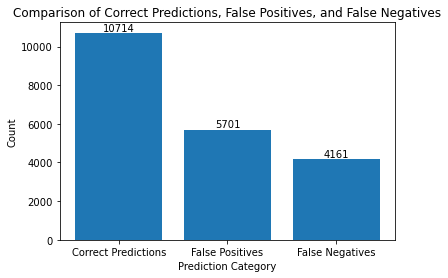

In [ ]:
correct_count = len(correct_predictions_bilstm)
false_positive_count = len(false_positives_bilstm)
false_negative_count = len(false_negatives_bilstm)

plt.bar(['Correct Predictions', 'False Positives', 'False Negatives'],
    [correct_count, false_positive_count, false_negative_count])

plt.xlabel('Prediction Category')
plt.ylabel('Count')
plt.title('Comparison of Correct Predictions, False Positives, and False Negatives')

for i, count in enumerate([correct_count, false_positive_count, false_negative_count]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

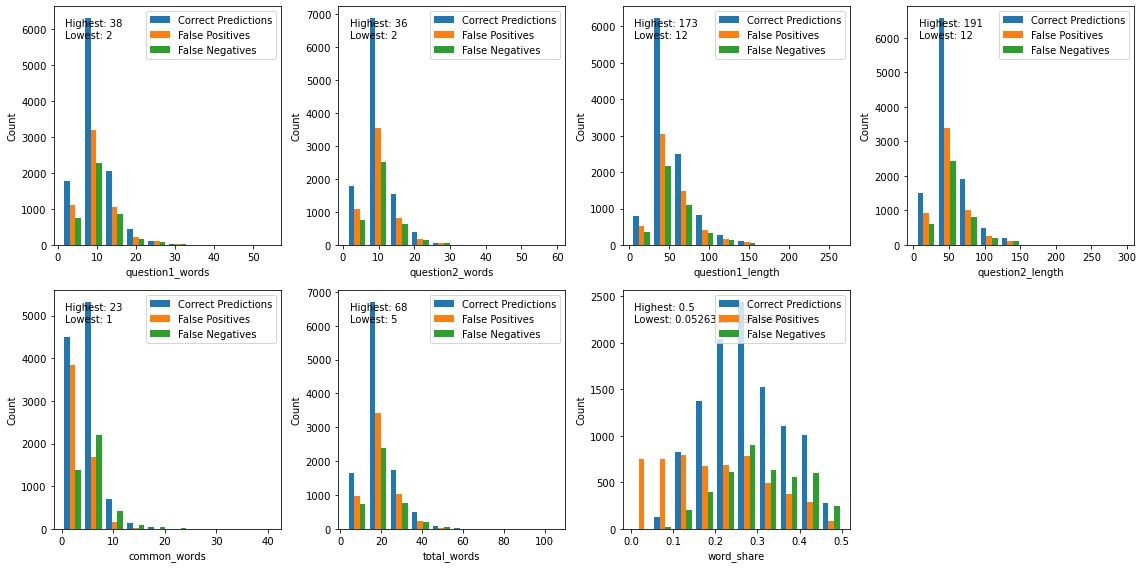

In [ ]:
import matplotlib.pyplot as plt

correct_question1_words = correct_predictions_bilstm['question1_words']
correct_question2_words = correct_predictions_bilstm['question2_words']
correct_question1_length = correct_predictions_bilstm['question1_length']
correct_question2_length = correct_predictions_bilstm['question2_length']
correct_common_words = correct_predictions_bilstm['common_words']
correct_total_words = correct_predictions_bilstm['total_words']
correct_word_share = correct_predictions_bilstm['word_share']

false_positive_question1_words = false_positives_bilstm['question1_words']
false_positive_question2_words = false_positives_bilstm['question2_words']
false_positive_question1_length = false_positives_bilstm['question1_length']
false_positive_question2_length = false_positives_bilstm['question2_length']
false_positive_common_words = false_positives_bilstm['common_words']
false_positive_total_words = false_positives_bilstm['total_words']
false_positive_word_share = false_positives_bilstm['word_share']

false_negative_question1_words = false_negatives_bilstm['question1_words']
false_negative_question2_words = false_negatives_bilstm['question2_words']
false_negative_question1_length = false_negatives_bilstm['question1_length']
false_negative_question2_length = false_negatives_bilstm['question2_length']
false_negative_common_words = false_negatives_bilstm['common_words']
false_negative_total_words = false_negatives_bilstm['total_words']
false_negative_word_share = false_negatives_bilstm['word_share']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

ax = axes[0, 0]
ax.hist([correct_question1_words, false_positive_question1_words, false_negative_question1_words],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('question1_words')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_question1_words)}\nLowest: {min(correct_question1_words)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[0, 1]
ax.hist([correct_question2_words, false_positive_question2_words, false_negative_question2_words],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('question2_words')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_question2_words)}\nLowest: {min(correct_question2_words)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[0, 2]
ax.hist([correct_question1_length, false_positive_question1_length, false_negative_question1_length],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('question1_length')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_question1_length)}\nLowest: {min(correct_question1_length)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[0, 3]
ax.hist([correct_question2_length, false_positive_question2_length, false_negative_question2_length],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('question2_length')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_question2_length)}\nLowest: {min(correct_question2_length)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[1, 0]
ax.hist([correct_common_words, false_positive_common_words, false_negative_common_words],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('common_words')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_common_words)}\nLowest: {min(correct_common_words)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[1, 1]
ax.hist([correct_total_words, false_positive_total_words, false_negative_total_words],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('total_words')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_total_words)}\nLowest: {min(correct_total_words)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[1, 2]
ax.hist([correct_word_share, false_positive_word_share, false_negative_word_share],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('word_share')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_word_share)}\nLowest: {min(correct_word_share)}',
        transform=ax.transAxes, verticalalignment='top')

fig.delaxes(axes[1, 3])
fig.tight_layout()
plt.show()

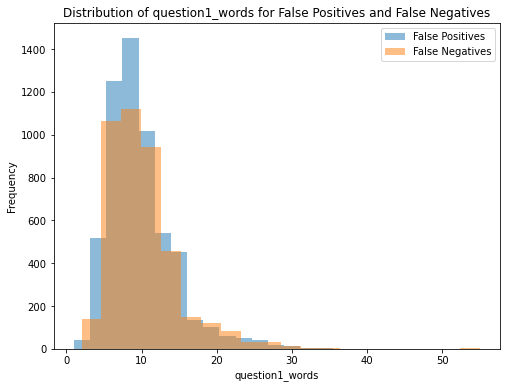

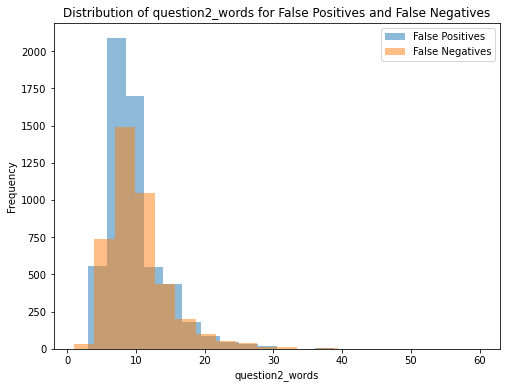

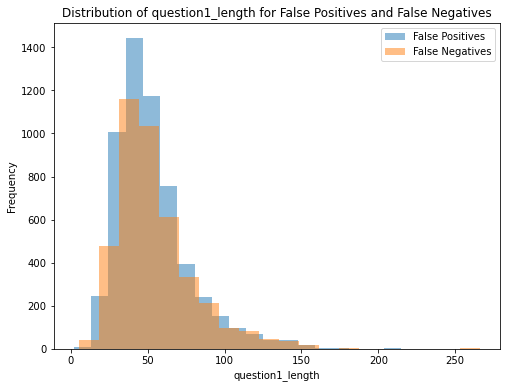

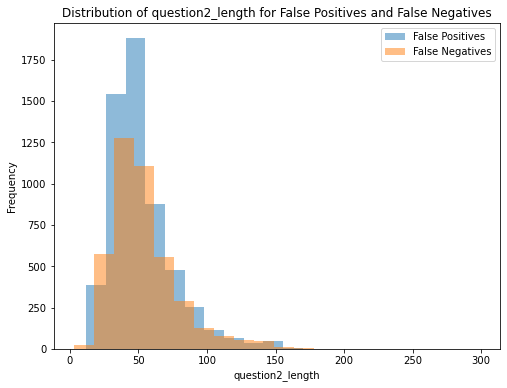

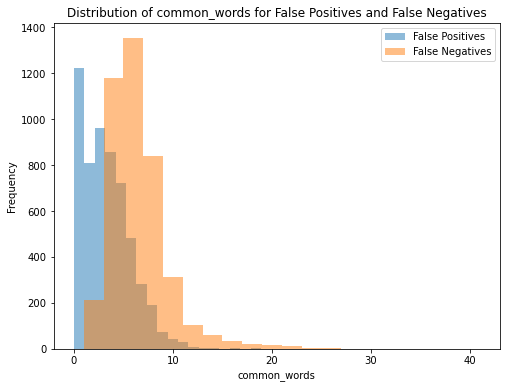

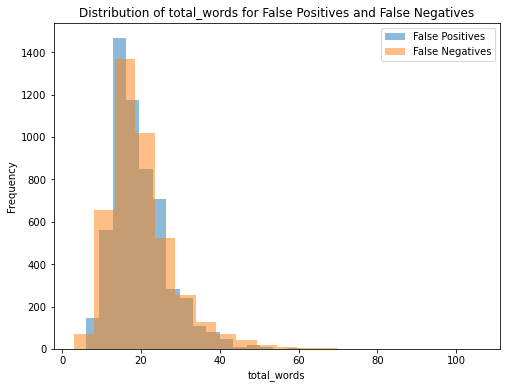

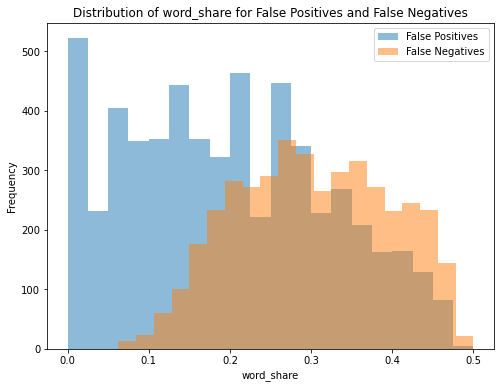

In [ ]:
import matplotlib.pyplot as plt

columns_to_analyze = ['question1_words', 'question2_words', 'question1_length', 'question2_length',
                      'common_words', 'total_words', 'word_share']

for column in columns_to_analyze:
    false_positives = results_bilstm[(results_bilstm['predicted_label'] == 1) & (results_bilstm['true_label'] == 0)]
    false_negatives = results_bilstm[(results_bilstm['predicted_label'] == 0) & (results_bilstm['true_label'] == 1)]

    plt.figure(figsize=(8, 6))
    plt.hist(false_positives[column], bins=20, alpha=0.5, label='False Positives')
    plt.hist(false_negatives[column], bins=20, alpha=0.5, label='False Negatives')

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column} for False Positives and False Negatives')
    plt.legend()
    plt.show()

We notice that the common words and word_share have different range for positive and negative false predictions

In [ ]:
false_positives = results_bilstm[(results_gru['predicted_label'] == 1) & (results_gru['true_label'] == 0)]
false_negatives = results_bilstm[(results_gru['predicted_label'] == 0) & (results_gru['true_label'] == 1)]

count_false_positives = false_positives['question1'].str.count('MATH').sum() + false_positives['question2'].str.count('MATH').sum()

count_false_negatives = false_negatives['question1'].str.count('MATH').sum() + false_negatives['question2'].str.count('MATH').sum()

print("Number of occurrences of 'MATH' in false positives:", count_false_positives)
print("Number of occurrences of 'MATH' in false negatives:", count_false_negatives)


Number of occurrences of 'MATH' in false positives: 0
Number of occurrences of 'MATH' in false negatives: 1


We checked on Kaggle and found that the word 'MATH' is present around 900 times in the dataset. Thus we tried to find if there is any dependency but found none.

#### GRU

In [ ]:
predictions_gru = loaded_gru_model.predict([test_seq1, test_seq2])
predicted_labels_gru = np.round(predictions_gru).flatten().astype(int)

results_gru = pd.DataFrame({'question1': test_data['question1'],
                            'question2': test_data['question2'],
                            'predicted_label': predicted_labels_gru,
                            'true_label': test_labels})

print(results_gru)

1264/1264 [==============================] - 62s 49ms/step
                                                question1  \
13            What was your first sexual experience like?   
15      What would a Trump presidency mean for current...   
27      Does society place too much importance on sports?   
37      When a girlfriend asks her boyfriend "Why did ...   
45      What is the quickest way to increase Instagram...   
...                                                   ...   
404261  Who is the overall most popular Game of Throne...   
404265                  How can I gain weight on my body?   
404279  What is the minimum time required to build a f...   
404282        How does a long distance relationship work?   
404284         What does Jainism say about homosexuality?   

                                                question2  predicted_label  \
13                 What was your first sexual experience?                1   
15      How will a Trump presidency affect the stude

In [ ]:
results_gru.head()

,question1,question2,predicted_label,true_label
13,What was your first sexual experience like?,What was your first sexual experience?,1,1
15,What would a Trump presidency mean for current...,How will a Trump presidency affect the student...,1,1
27,Does society place too much importance on sports?,How do sports contribute to the society?,1,0
37,"When a girlfriend asks her boyfriend ""Why did ...",My girlfriend said that we should end this bec...,0,0
45,What is the quickest way to increase Instagram...,How can we increase our number of Instagram fo...,1,0


In [ ]:
results_gru['question1_words'] = results_gru['question1'].apply(lambda x: len(x.split()))
results_gru['question2_words'] = results_gru['question2'].apply(lambda x: len(x.split()))
results_gru['question1_length'] = results_gru['question1'].apply(len)
results_gru['question2_length'] = results_gru['question2'].apply(len)
results_gru['common_words'] = results_gru.apply(lambda row: len(set(row['question1'].lower().split()).intersection(row['question2'].lower().split())), axis=1)
results_gru['total_words'] = results_gru.apply(lambda row: len(row['question1'].lower().split()) + len(row['question2'].lower().split()), axis=1)
results_gru['word_share'] = results_gru.apply(lambda row: row['common_words'] / row['total_words'] if row['total_words'] > 0 else 0, axis=1)

In [ ]:
results_gru.head()

,question1,question2,predicted_label,true_label,question1_words,question2_words,question1_length,question2_length,common_words,total_words,word_share
13,What was your first sexual experience like?,What was your first sexual experience?,1,1,7,6,43,38,5,13,0.384615
15,What would a Trump presidency mean for current...,How will a Trump presidency affect the student...,1,1,15,17,93,91,4,32,0.125000
27,Does society place too much importance on sports?,How do sports contribute to the society?,1,0,8,7,49,40,0,15,0.000000
37,"When a girlfriend asks her boyfriend ""Why did ...",My girlfriend said that we should end this bec...,0,0,25,37,127,194,4,62,0.064516
45,What is the quickest way to increase Instagram...,How can we increase our number of Instagram fo...,1,0,9,9,57,54,3,18,0.166667


In [ ]:
correct_predictions_gru = results_gru[(results_gru['predicted_label'] == 1) & (results_gru['true_label'] == 1)]
false_positives_gru = results_gru[(results_gru['predicted_label'] == 1) & (results_gru['true_label'] == 0)]
false_negatives_gru = results_gru[(results_gru['predicted_label'] == 0) & (results_gru['true_label'] == 1)]

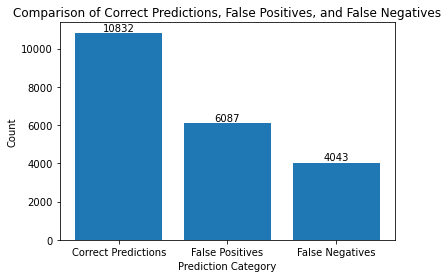

In [ ]:
correct_count = len(correct_predictions_gru)
false_positive_count = len(false_positives_gru)
false_negative_count = len(false_negatives_gru)

plt.bar(['Correct Predictions', 'False Positives', 'False Negatives'],
        [correct_count, false_positive_count, false_negative_count])

plt.xlabel('Prediction Category')
plt.ylabel('Count')
plt.title('Comparison of Correct Predictions, False Positives, and False Negatives')

for i, count in enumerate([correct_count, false_positive_count, false_negative_count]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

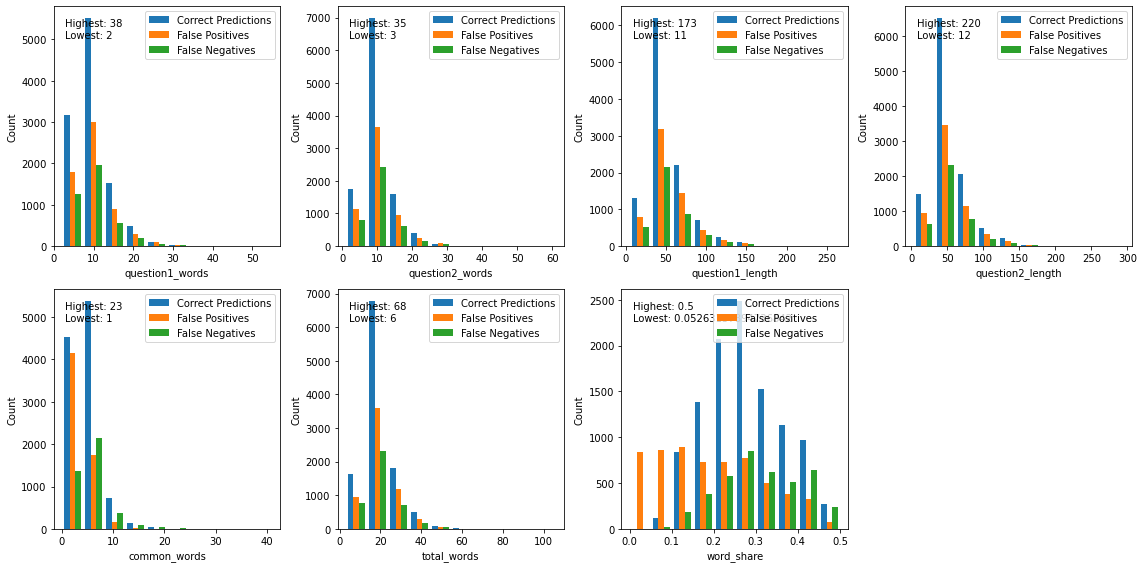

In [ ]:
correct_question1_words = correct_predictions_gru['question1_words']
correct_question2_words = correct_predictions_gru['question2_words']
correct_question1_length = correct_predictions_gru['question1_length']
correct_question2_length = correct_predictions_gru['question2_length']
correct_common_words = correct_predictions_gru['common_words']
correct_total_words = correct_predictions_gru['total_words']
correct_word_share = correct_predictions_gru['word_share']

false_positive_question1_words = false_positives_gru['question1_words']
false_positive_question2_words = false_positives_gru['question2_words']
false_positive_question1_length = false_positives_gru['question1_length']
false_positive_question2_length = false_positives_gru['question2_length']
false_positive_common_words = false_positives_gru['common_words']
false_positive_total_words = false_positives_gru['total_words']
false_positive_word_share = false_positives_gru['word_share']

false_negative_question1_words = false_negatives_gru['question1_words']
false_negative_question2_words = false_negatives_gru['question2_words']
false_negative_question1_length = false_negatives_gru['question1_length']
false_negative_question2_length = false_negatives_gru['question2_length']
false_negative_common_words = false_negatives_gru['common_words']
false_negative_total_words = false_negatives_gru['total_words']
false_negative_word_share = false_negatives_gru['word_share']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

ax = axes[0, 0]
ax.hist([correct_question1_words, false_positive_question1_words, false_negative_question1_words],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('question1_words')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_question1_words)}\nLowest: {min(correct_question1_words)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[0, 1]
ax.hist([correct_question2_words, false_positive_question2_words, false_negative_question2_words],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('question2_words')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_question2_words)}\nLowest: {min(correct_question2_words)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[0, 2]
ax.hist([correct_question1_length, false_positive_question1_length, false_negative_question1_length],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('question1_length')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_question1_length)}\nLowest: {min(correct_question1_length)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[0, 3]
ax.hist([correct_question2_length, false_positive_question2_length, false_negative_question2_length],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('question2_length')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_question2_length)}\nLowest: {min(correct_question2_length)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[1, 0]
ax.hist([correct_common_words, false_positive_common_words, false_negative_common_words],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('common_words')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_common_words)}\nLowest: {min(correct_common_words)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[1, 1]
ax.hist([correct_total_words, false_positive_total_words, false_negative_total_words],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('total_words')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_total_words)}\nLowest: {min(correct_total_words)}',
        transform=ax.transAxes, verticalalignment='top')

ax = axes[1, 2]
ax.hist([correct_word_share, false_positive_word_share, false_negative_word_share],
        label=['Correct Predictions', 'False Positives', 'False Negatives'])
ax.set_xlabel('word_share')
ax.set_ylabel('Count')
ax.legend()
ax.text(0.05, 0.95, f'Highest: {max(correct_word_share)}\nLowest: {min(correct_word_share)}',
        transform=ax.transAxes, verticalalignment='top')

fig.delaxes(axes[1, 3])
fig.tight_layout()
plt.show()

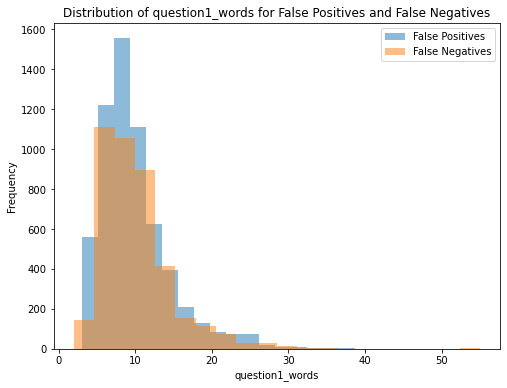

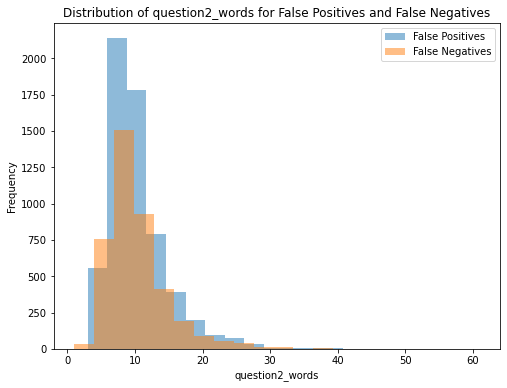

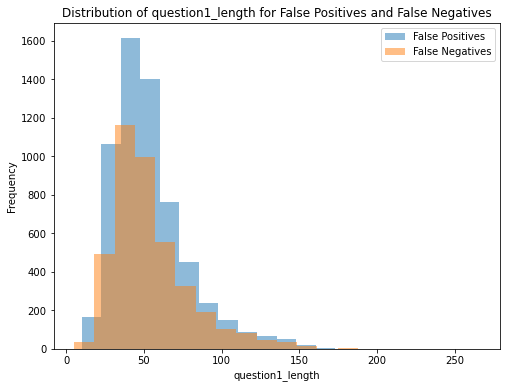

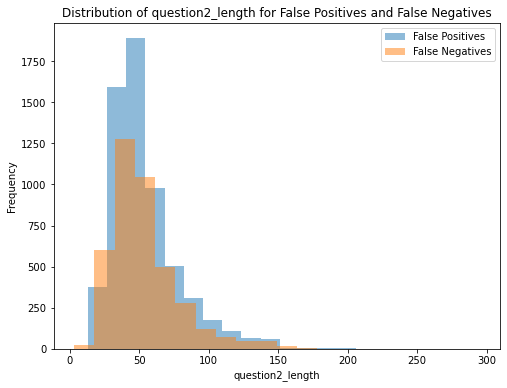

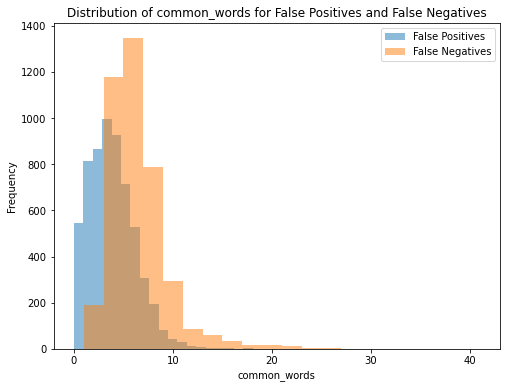

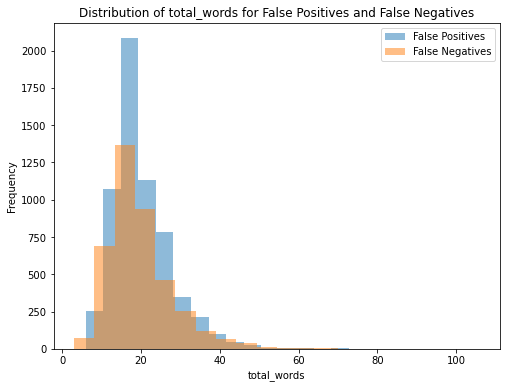

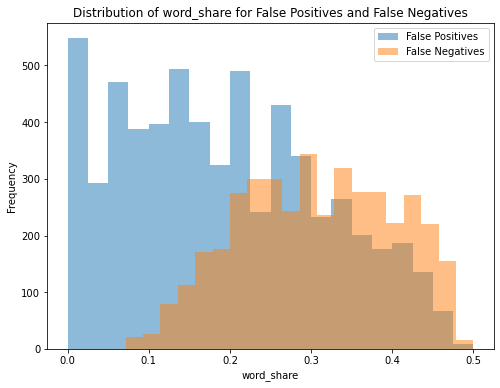

In [ ]:
import matplotlib.pyplot as plt

columns_to_analyze = ['question1_words', 'question2_words', 'question1_length', 'question2_length',
                      'common_words', 'total_words', 'word_share']

for column in columns_to_analyze:
    false_positives = results_gru[(results_gru['predicted_label'] == 1) & (results_gru['true_label'] == 0)]
    false_negatives = results_gru[(results_gru['predicted_label'] == 0) & (results_gru['true_label'] == 1)]

    plt.figure(figsize=(8, 6))
    plt.hist(false_positives[column], bins=20, alpha=0.5, label='False Positives')
    plt.hist(false_negatives[column], bins=20, alpha=0.5, label='False Negatives')

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column} for False Positives and False Negatives')
    plt.legend()
    plt.show()

For GRU too, the common words and word_share have different range for positive and negative predictions.

In [ ]:
# Filter data for false positives and false negatives
false_positives = results_gru[(results_gru['predicted_label'] == 1) & (results_gru['true_label'] == 0)]
false_negatives = results_gru[(results_gru['predicted_label'] == 0) & (results_gru['true_label'] == 1)]

# Count the occurrences of 'MATH' in false positives
count_false_positives = false_positives['question1'].str.count('MATH').sum() + false_positives['question2'].str.count('MATH').sum()

# Count the occurrences of 'MATH' in false negatives
count_false_negatives = false_negatives['question1'].str.count('MATH').sum() + false_negatives['question2'].str.count('MATH').sum()

# Print the results
print("Number of occurrences of 'MATH' in false positives:", count_false_positives)
print("Number of occurrences of 'MATH' in false negatives:", count_false_negatives)


Number of occurrences of 'MATH' in false positives: 0
Number of occurrences of 'MATH' in false negatives: 1


There is no dependence on 'MATH' word on this model too.

**It is concluded that the best models were BiLSTM and GRU with 74.86 and 74.5 F1 score respectively.**